AI - Project 01 : Search - Sara Tavakoli - 810196684

در این پروژه میخواهیم نگاهی به نحوه کار برخی از الگوریتم های جستجو بیندازیم مانند
BFS, IDS, A*
که بعضی از آن ها آگاهانه و بعضی نا آگاهانه هستند و هرکدام از آن ها مزایا و معایبی نسبت به یکدیگر دارند. از همین ابتدا
میتوان گفت همانطور که انتظار میرود الگوریتم های آگاهانه جستجو بهترو سریع تر هستند زیرا برای تصمیم گیری و جستجو از اطلاعات
بیشتری استفاده میکنند که سایر الگوریتم های نا آگاهانه نمیکنند.
حال میخواهیم مسأله مطرح شده در این پروژه را با استفاده از هر یک از این الگوریتم ها حل کنیم و نتایج را مقایسه کنیم.
مسأله طرح شده در این پروژه نقشه یک شهر است که به صورت یک صفحه ی شطرنجی داده شده است که در آن تعدادی بیمار و بیمارستان وجود دارد و ما به عنوان تنها آمبولانس شهر موظف هستیم با استفاده از الگوریتم جستجو مناسب این بیمارها را در کمترین زمان ممکن به بیمارستانهای شهر منتقل کنیم. (هدف از انجام پروژه این است) 

نحوه مدل کردن مسأله

مسأله شامل تعدادی 
state 
آغاز میکنیم و تا زمانی که به initial state میباشد که جستجو را از 
برسیم آن را ادامه میدهیم. هرgoal state
شامل یک سری اطلاعات مانند جای آمبولانس و بیمار ها و بیمارستان ها-هزینه (سطح) ی رسیدن بهstate
آن و...

initial state:
حالتی است که نقشه شهر را از فایل  ورودی میخوانیم و با آن الگوریتم جستجو را آغاز میکنیم و 
ها را گسترش میدهیم node

goal state:
ای است که در آن در نقشه ی شهر هیچ بیماری باقی نمانده باشد (یعنی در نقشه کاراکتر state
نداشته باشیم) 'P'

action:
های مجاز در این پروژه شامل : بالا-پايین-چپ-راست بردن آمبولانس میباشد. همچنین آمبولانس action
میتواند بیمار های مجاور خود را نیز در طی حرکت خودش جا به جا کند. اما حرکت فقط در صورتی امکان پذیر است که به مانع (دیوار) یا بیمارستان بدون ظرفیت و ... برخورد نکنیم.


در ابتدا کاراکتر های مشخصی که در نقشه نماد آمبولانس و دیوار و بیمار و فضای خالی هستند را  
میکنیم import  مشخص میکنیم و کتابخانه های استفاده شده را

In [ ]:
from queue import Queue
from time import time

OBSTACLE_CH = '#'
AMBULANCE_CH = 'A'
PATIENT_CH = 'P'
SPACE_CH = ' '

مربوط به کلاس constructor در گام بعدی کلاس و  
را تعریف میکنیم که در آن نام فایلی که ورودی باید از آن خوانده شود را میگیریم و mapAction
محتوای آن را ذخیره میکنیم و سایر مشخصه ها را مقداردهی اولیه میکنیم

را پیاده سازی میکنیم که در آن نقشه جدید را از ورودی تابع میگیریم و changeMap سپس تابع
جایگزین نقشه ذخیره شده قبلی میکنیم. و بعد تابع
را صدا میزنیم که در آن در نقشه ذخیره شده جای آمبولانس را میابیم و ست میکنیم findAmbulance

In [ ]:
class mapActions:
    def __init__(self, fileName):
        f = open(fileName, "r")
        content = f.read()
        graph = content.splitlines()
        for i in range(len(graph)):
            graph[i] = list(graph[i])
        self.map = graph
        self.findAmbulance()
        self.height = len(graph)
        self.width = len(graph[0])
        self.numOfallExploredStates = 0
        self.numOfUniqueExploredStates = 0
        
    def changeMap(self, hashStr):
        graph = hashStr.splitlines()
        for i in range(len(graph)):
            graph[i] = list(graph[i])
        self.map = graph
        self.findAmbulance()

    def findAmbulance(self):
        for i in range(len(self.map)):
            for j in range(len(self.map[0])):
                if self.map[i][j] == AMBULANCE_CH:
                    self.ambulanceY = i
                    self.ambulanceX = j

 در ادامه توابع مربوط به حرکت آمبولانس در نقشه برای هر ۴ جهت را در کلاس پیاده سازی میکنیم
برمیگرداند False که در صورت عدم توانایی حرکت در آن جهت 

In [ ]:
    def moveRight(self):
        if self.ambulanceX < self.height - 3 and self.map[self.ambulanceY][self.ambulanceX+1] == PATIENT_CH and self.map[self.ambulanceY][self.ambulanceX+2].isnumeric():
            if int(self.map[self.ambulanceY][self.ambulanceX+2].isnumeric()) > 0:
                self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
                self.map[self.ambulanceY][self.ambulanceX+1] = AMBULANCE_CH
                self.map[self.ambulanceY][self.ambulanceX+2] = str(int(self.map[self.ambulanceY][self.ambulanceX+2])-1)
                self.ambulanceX+=1
                return True
        elif self.ambulanceX < self.width - 3 and self.map[self.ambulanceY][self.ambulanceX+1] == PATIENT_CH and self.map[self.ambulanceY][self.ambulanceX+2] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceX+=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            self.map[self.ambulanceY][self.ambulanceX+1] = PATIENT_CH
            return True
        elif self.ambulanceX < self.width - 2 and self.map[self.ambulanceY][self.ambulanceX+1] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceX+=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            return True
        else:
            return False

    def moveLeft(self):
        if self.ambulanceX > 2 and self.map[self.ambulanceY][self.ambulanceX-1] == PATIENT_CH and self.map[self.ambulanceY][self.ambulanceX-2].isnumeric():
            if int(self.map[self.ambulanceY][self.ambulanceX-2]) > 0:
                self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
                self.map[self.ambulanceY][self.ambulanceX-1] = AMBULANCE_CH
                self.map[self.ambulanceY][self.ambulanceX-2] = str(int(self.map[self.ambulanceY][self.ambulanceX-2])-1)
                self.ambulanceX-=1
                return True
        elif self.ambulanceX > 2 and self.map[self.ambulanceY][self.ambulanceX-1] == PATIENT_CH and self.map[self.ambulanceY][self.ambulanceX-2] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceX-=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            self.map[self.ambulanceY][self.ambulanceX-1] = PATIENT_CH
            return True
        elif self.ambulanceX > 1 and self.map[self.ambulanceY][self.ambulanceX-1] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceX-=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            return True
        else:
            return False

    def moveUp(self):
        if self.ambulanceY > 2 and self.map[self.ambulanceY-1][self.ambulanceX] == PATIENT_CH and self.map[self.ambulanceY-2][self.ambulanceX].isnumeric():
            if int(self.map[self.ambulanceY-2][self.ambulanceX]) > 0:
                self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
                self.map[self.ambulanceY-1][self.ambulanceX] = AMBULANCE_CH
                self.map[self.ambulanceY-2][self.ambulanceX] = str(int(self.map[self.ambulanceY-2][self.ambulanceX])-1)
                self.ambulanceY-=1
                return True
        elif self.ambulanceY > 2 and self.map[self.ambulanceY-1][self.ambulanceX] == PATIENT_CH and self.map[self.ambulanceY-2][self.ambulanceX] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceY-=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            self.map[self.ambulanceY-1][self.ambulanceX] = PATIENT_CH
            return True
        elif self.ambulanceY > 1 and self.map[self.ambulanceY-1][self.ambulanceX] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceY-=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            return True
        else:
            return False

    def moveDown(self):
        if self.ambulanceY < self.height - 3 and self.map[self.ambulanceY+1][self.ambulanceX] == PATIENT_CH and self.map[self.ambulanceY+2][self.ambulanceX].isnumeric():
            if int(self.map[self.ambulanceY+2][self.ambulanceX]) > 0:
                self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
                self.map[self.ambulanceY+1][self.ambulanceX] = AMBULANCE_CH
                self.map[self.ambulanceY+2][self.ambulanceX] = str(int(self.map[self.ambulanceY+2][self.ambulanceX])-1)
                self.ambulanceY+=1
                return True
        elif self.ambulanceY < len(self.map) - 3 and self.map[self.ambulanceY+1][self.ambulanceX] == PATIENT_CH and self.map[self.ambulanceY+2][self.ambulanceX] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceY+=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            self.map[self.ambulanceY+1][self.ambulanceX] = PATIENT_CH
            return True
        elif self.ambulanceY < len(self.map) - 2 and self.map[self.ambulanceY+1][self.ambulanceX] == SPACE_CH:
            self.map[self.ambulanceY][self.ambulanceX] = SPACE_CH
            self.ambulanceY+=1
            self.map[self.ambulanceY][self.ambulanceX] = AMBULANCE_CH
            return True
        else:
            return False

مربوط به کلاس constructor در گام بعدی کلاس و  
را تعریف میکنیم که در آن محل آمبولانس و نقشه مربوط به این حالت و  state
  را به عنوان ورودی تابع میگیریم و آن ها را ست میکنیم parentState 
و سایر مشخصه ها را مقداردهی اولیه میکنیم

را پیاده سازی میکنیم که در آن نقشه را از ورودی تابع میگیریم و craeteHash سپس تابع
مربوط به آن را میسازیم و ست میکنیم hash

از رویsetLevel و در تابع
سطح را ست میکنیم parent سطح

In [ ]:
class state:
    def __init__(self, ambulanceX, ambulanceY, newMap, parent):
        self.ambulanceX = ambulanceX
        self.ambulanceY = ambulanceY
        self.createHash(newMap)
        self.parent = parent
        self.setLevel()
        self.map = newMap
    def createHash(self, mapGraph):
        self.hashMap = ''
        for i in mapGraph:
            self.hashMap += ''.join(i)
            self.hashMap += '\n'
    def setLevel(self):
        if self.parent != None:
            self.level = self.parent.level + 1
        else:
            self.level = 0

BFS: Compelete, Optimal
Breadth-first search (BFS) is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root (or some arbitrary node of a graph), and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.

the time complexity of this algorithm is O(b^d) (b: branchin factor and d: depth of the answer) also the memory it uses is O(b^d)

For any new state we make, we add another node to frontier (If it is unique) and also the satate's hash into reached set. That's because in BFS we can be sure that if we see a new state which was added into the frontier or reached set before, it doesn't have to be added to the frontier again.

the advantage of using this algorithm is that its complete

BFS Implementation:

In [ ]:
def BFS(originalMap):
    moves = ['up', 'down', 'left', 'right']
    frontier = Queue()
    visited = set()
    initialState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, None)
    frontier.put(initialState)
    visited.add(initialState.hashMap)
    originalMap.numOfUniqueExploredStates+=1
    originalMap.numOfUniqueExploredStates+=1
    while not frontier.empty():
        nowState = frontier.get()
        for move in moves:
            originalMap.changeMap(nowState.hashMap)
            if move == 'up':
                originalMap.moveUp()
            elif move == 'down':
                originalMap.moveDown()
            elif move == 'left':
                originalMap.moveLeft()
            else:
                originalMap.moveRight()
            newState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, nowState)
            originalMap.numOfallExploredStates+=1
            if newState.hashMap not in visited:
                originalMap.numOfUniqueExploredStates+=1
                thereIsPatient = False
                for line in newState.map:
                    if PATIENT_CH in line:
                        thereIsPatient = True
                        break
                if not thereIsPatient:
                    return newState
                else:
                    frontier.put(newState)
                    visited.add(newState.hashMap)
    return None

IDS (Iterative Deepening Search) : Compelete, Optimal
Algorithm: In computer science, iterative deepening search is a state space/graph search strategy in which a depth-limited version of depth-first search is run repeatedly with increasing depth limits until the goal is found. This means that IDS combines depth-first search’s space-efficiency and breadth-first search’s fast search (for nodes closer to root).
IDS calls DFS for different depths starting from an initial value. In every call, DFS is restricted from going beyond given depth. So basically we do DFS in a BFS fashion.

The time complexity of this algorithm is O(b^d) cause it acts like BFS and traverse by the depth that we give to it. But the advantage of this algorithm is its memory that is use O(bd) (since we store nodes that goes in the maximum depth in the state space)

(In my implementation of DFS, branches of DFS won't expand in states that have been expanded before with shorter or equal path lengths to that point.
This method advantage is it's memory.)

Implementation of IDS and DFS:
(worse than other algorithms in time, but better memory)

In [ ]:
def DFS(originalMap, currentState, maxDepth, currentDepth, reached, moves, depths):
    currentState.isThisStateGoalState()
    originalMap.numOfallExploredStates+=1
    if currentState.isGoalState:
        return currentState
    if currentDepth >= maxDepth:
        return None
    if currentState.hashMap in reached:
        if depths[currentState.hashMap] <= currentDepth:
            return None
    else:
        originalMap.numOfUniqueExploredStates+=1
    
    depths[currentState.hashMap] = currentDepth
    reached.add(currentState.hashMap)
    originalMap.allReached.add(currentState.hashMap)

    for move in moves:
        originalMap.changeMap(currentState.hashMap)
        if move == 'up':
            originalMap.moveUp()
        elif move == 'down':
            originalMap.moveDown()
        elif move == 'left':
            originalMap.moveLeft()
        else:
            originalMap.moveRight()
        newState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, currentState)
        currentDepth = currentDepth + 1
        goal = DFS(originalMap, newState, maxDepth, currentDepth, reached, moves, depths)
        if goal is not None:
            return goal
    return None

def IDS(originalMap):
    moves = ['up', 'down', 'left', 'right']
    initialState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, None)
    originalMap.numOfallExploredStates+=1
    originalMap.numOfUniqueExploredStates+=1
    maxDepth = 0
    while True:
        maxDepth += 1
        reachedSet = set()
        depthDic = dict()
        tempState = DFS(originalMap, initialState, maxDepth, 0, reachedSet, moves, depthDic)
        if tempState is not None:
            return tempState

Informed search:
A*: Compelete, few states than previous algorithms(if hueristic is admissible, optimal with this condition)
A* is like Greedy Best-First-Search in that it can use a heuristic to guide itself

The secret to its success is that it combines the pieces of information  (favoring vertices that are close to the starting point).

We can not talk about its time complexity and memori it uses cause its related to the heuristic we choose and also how agents act through running the algorithm

our function here is like bfs with a frontier in type of Priority Queue
wich the priority of each state calculate by calculateH function

Hueristic:
اولین هیوریستیک استفاده شده (که لزومن ادمیسیبل نیست):  
فاصله منهتنی بیمار ها تا همه بیمارستان ها + فاصله منهتنی آمبولانس تا بیمار ها

Manhatan distance:
x=(a,b) and y=(c,d)
manhatanD = |a−c|+|b−d|

𝑓(𝑛)=𝑔(𝑛)+ℎ(𝑛)
مجموع هزینه تا رسیدن به این استیت g(n)
تخمین از هزینه باقی مانده تا رسیدن به استیت نهایی h(n)

below function belongs to class state

PriorityQueue در الگوریتم ای استار به جای صف(فایفو) برای فرانتیر از 
 calculateH استفاده میکنیم و اولویت استیت ها با تابع
مشخص میشود

In [ ]:
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0
        self.size = 0
 
    def push(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1
        self.size += 1
 
    def pop(self):
        self.size -= 1
        return heapq.heappop(self._queue)[-1]

In [ ]:
def calculateH(self):
        currentCost = self.level
        distanceFromAmbulanceToPatients = 0
        mapX = len(self.map[0])
        mapY = len(self.map)
        for i in range(mapY):
            for j in range(mapX):
                if self.map[i][j] == PATIENT_CH:
                    distanceFromAmbulanceToPatients += abs(i-self.ambulanceY) + abs(j-self.ambulanceX)
                    self.patientsPlace.append(j)
                    self.patientsPlace.append(i)
                elif self.map[i][j].isnumeric() and self.map[i][j] != '0':
                    self.hospitalsPlace.append(j)
                    self.hospitalsPlace.append(i)
        distanceFromPatientsToHospitals = 0
        for i in range(0, len(self.patientsPlace), 2):
            x = self.patientsPlace[i]
            y = self.patientsPlace[i+1]
            for j in range(0, len(self.hospitalsPlace), 2):
                x2 = self.hospitalsPlace[j]
                y2 = self.hospitalsPlace[j+1]
                distanceFromPatientsToHospitals += abs(x2-x)+abs(y2-y)
        return distanceFromAmbulanceToPatients + distanceFromPatientsToHospitals + currentCost

In [ ]:
def BFS(originalMap):
    moves = ['up', 'down', 'left', 'right']
    frontier = PriorityQueue()
    visited = set()
    reached = set()
    initialState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, None)
    frontier.push(initialState, initialState.calculateH())
    visited.add(initialState.hashMap)
    originalMap.numOfallExploredStates+=1
    originalMap.numOfUniqueExploredStates+=1
    while frontier.size:
        nowState = frontier.pop()
        reached.add(nowState.hashMap)
        for move in moves:
            originalMap.changeMap(nowState.hashMap)
            if move == 'up':
                originalMap.moveUp()
            elif move == 'down':
                originalMap.moveDown()
            elif move == 'left':
                originalMap.moveLeft()
            else:
                originalMap.moveRight()
            newState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, nowState)
            originalMap.numOfallExploredStates+=1
            if newState.hashMap not in visited:
                originalMap.numOfUniqueExploredStates+=1
                thereIsPatient = False
                for line in newState.map:
                    if PATIENT_CH in line:
                        thereIsPatient = True
                        break
                if not thereIsPatient:
                    return newState
                else:
                    frontier.push(newState, newState.calculateH())
                    visited.add(newState.hashMap)
    return None

هیوریستیک دوم:
فاصله منهتنی هر بیمار ها تا نزدیک ترین بیمارستان + فاصله منهتنی آمبولانس تا نزدیک ترین بیمار
این هیوریستیک ادمیسیبل است
زیرا هدف اصلی این است که آمبولانس تمام بیماران را تا یک بیمارستان برساند. (و برای بهینه شدن زمان باید آن بیمار رابه نزدیک
ترین بیمارستان برساند.) بنابراین با اضافه کردن فاصله منهتنی هر بیمار تا نزدیک ترین بیمارستان و همچنین اضافه کردن فاصله
منهتنی آمبولانس تا نزدیک ترین بیمار به هزینه این استیت,به استیتی که مینیمم این مجموع را داشته باشد اولویت بیشتری میدهیم و زود تر آن را میبینیم و بنابراین این هیوریستیک ادمیسبل است.

blow function belongs to class state

In [ ]:
def calculateH(self):
        currentCost = self.level
        distanceFromAmbulanceToPatients = 0
        mapX = len(self.map[0])
        mapY = len(self.map)
        minDistanceFromPatients = float("inf")
        for i in range(mapY):
            for j in range(mapX):
                if self.map[i][j] == PATIENT_CH:
                    tempDis = abs(i-self.ambulanceY) + abs(j-self.ambulanceX)
                    if tempDis < minDistanceFromPatients:
                        minDistanceFromPatients = tempDis
                    self.patientsPlace.append(j)
                    self.patientsPlace.append(i)
                elif self.map[i][j].isnumeric() and self.map[i][j] != '0':
                    self.hospitalsPlace.append(j)
                    self.hospitalsPlace.append(i)
        distanceFromPatientsToHospitals = 0
        for i in range(0, len(self.patientsPlace), 2):
            minDistanceFromHospitals = float("inf")
            for j in range(0, len(self.hospitalsPlace), 2):
                tempDistance = abs(self.hospitalsPlace[j]-self.patientsPlace[i])+abs(self.hospitalsPlace[j+1]-self.patientsPlace[i+1])
                if tempDistance < minDistanceFromHospitals:
                    tempDistance = minDistanceFromHospitals
            distanceFromPatientsToHospitals += tempDistance
        return minDistanceFromPatients + distanceFromPatientsToHospitals + currentCost

In [ ]:
def BFS(originalMap):
    moves = ['up', 'down', 'left', 'right']
    frontier = PriorityQueue()
    visited = set()
    reached = set()
    initialState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, None)
    frontier.push(initialState, initialState.calculateH())
    visited.add(initialState.hashMap)
    originalMap.numOfallExploredStates+=1
    originalMap.numOfUniqueExploredStates+=1
    while frontier.size:
        nowState = frontier.pop()
        reached.add(nowState.hashMap)
        for move in moves:
            originalMap.changeMap(nowState.hashMap)
            if move == 'up':
                originalMap.moveUp()
            elif move == 'down':
                originalMap.moveDown()
            elif move == 'left':
                originalMap.moveLeft()
            else:
                originalMap.moveRight()
            newState = state(originalMap.ambulanceX, originalMap.ambulanceY, originalMap.map, nowState)
            originalMap.numOfallExploredStates+=1
            if newState.hashMap not in visited:
                originalMap.numOfUniqueExploredStates+=1
                thereIsPatient = False
                for line in newState.map:
                    if PATIENT_CH in line:
                        thereIsPatient = True
                        break
                if not thereIsPatient:
                    return newState
                else:
                    frontier.push(newState, newState.calculateH())
                    visited.add(newState.hashMap)
    return None

Tests:

<table style="width:100%;">
    <tr></tr>
    <tr>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #1</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">All Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">11</td>
                    <td style="text-align: center;">982</td>
                    <td style="text-align: center;">302</td>
                    <td style="text-align: center;">0.05918s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">11</td>
                    <td style="text-align: center;">9478</td>
                    <td style="text-align: center;">226</td>
                    <td style="text-align: center;">0.12506s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A* 1</b></td>         
                    <td style="text-align: center;">11</td>
                    <td style="text-align: center;">143</td>
                    <td style="text-align: center;">73</td>
                    <td style="text-align: center;">0.00321s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A* 2</b></td>         
                    <td style="text-align: center;">11</td>
                    <td style="text-align: center;">983</td>
                    <td style="text-align: center;">301</td>
                    <td style="text-align: center;">0.02181s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #2</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">27</td>
                    <td style="text-align: center;">10133</td>
                    <td style="text-align: center;">2574</td>
                    <td style="text-align: center;">0.34727s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">27</td>
                    <td style="text-align: center;">459327</td>
                    <td style="text-align: center;">2430</td>
                    <td style="text-align: center;">6.10926s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A* 1</b></td>         
                    <td style="text-align: center;">31</td>
                    <td style="text-align: center;">3878</td>
                    <td style="text-align: center;">1261</td>
                    <td style="text-align: center;">0.08053s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A* 2</b></td>         
                    <td style="text-align: center;">27</td>
                    <td style="text-align: center;">10134</td>
                    <td style="text-align: center;">2573</td>
                    <td style="text-align: center;">0.18648s</td>
                </tr>
            </table>
        </td>
         <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #3</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">39</td>
                    <td style="text-align: center;">58048</td>
                    <td style="text-align: center;">15623</td>
                    <td style="text-align: center;">2.18728s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">39</td>
                    <td style="text-align: center;">3922202</td>
                    <td style="text-align: center;">3017</td>
                    <td style="text-align: center;">57.89718s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A* 1</b></td>         
                    <td style="text-align: center;">39</td>
                    <td style="text-align: center;">6565</td>
                    <td style="text-align: center;">2228</td>
                    <td style="text-align: center;">0.15693s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A* 2</b></td>         
                    <td style="text-align: center;">39</td>
                    <td style="text-align: center;">58049</td>
                    <td style="text-align: center;">15622</td>
                    <td style="text-align: center;">1.18995s</td>
                </tr>
            </table>
        </td>
    </tr>
    <tr></tr>

BFS Plot:

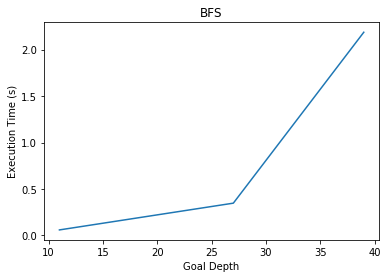

In [4]:
from matplotlib import pyplot as plt 
x = [11, 27, 39]
y = [0.05918248494466146, 0.3472788333892822, 2.1872805754343667]
plt.plot(x,y)
plt.title("BFS")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")
plt.show()

IDS Plot:

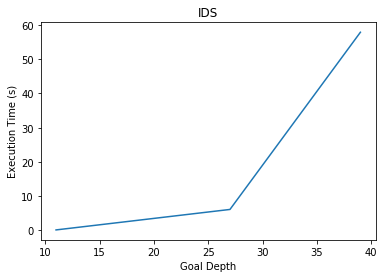

In [10]:
from matplotlib import pyplot as plt 
x = [11, 27, 39]
y = [0.125063181, 6.109261672, 57.89718747138977]
plt.plot(x,y)
plt.title("IDS")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")
plt.show()

A* 1 Plot:

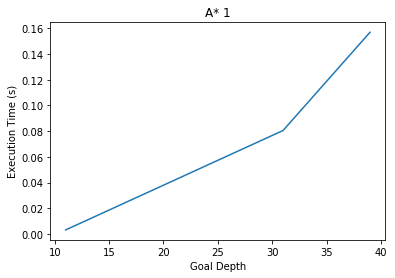

In [6]:
from matplotlib import pyplot as plt 
x = [11, 31, 39]
y = [0.0032116572062174478, 0.08053104082743327, 0.15693322817484537]
plt.plot(x,y)
plt.title("A* 1")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")
plt.show()

A* 2 Plot:

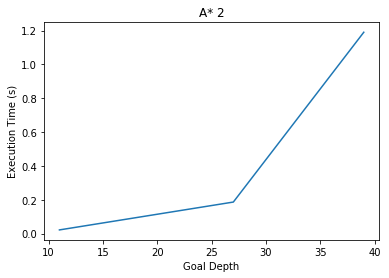

In [7]:
from matplotlib import pyplot as plt 
x = [11, 27, 39]
y = [0.021816412607828777, 0.18648211161295572, 1.1899495124816895]
plt.plot(x,y)
plt.title("A* 2")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")
plt.show()

End part of BFS code to show the result

In [ ]:
fileNames = ["test1.txt", "test2.txt", "test3.txt"]
cntr = 1
for fileName in fileNames:
    m = mapActions(fileName)
    s = time()
    finalState = (BFS(m))
    e = time()
    print("test number " + str(cntr))
    print("Time: " + str(e - s) + "s")
    print("Depth of goal is " + str(finalState.level))
    print("Number of all explored states are: " + str(m.numOfallExploredStates))
    print("Number of unique explored states are: " + str(m.numOfUniqueExploredStates))
    # print("Final state is:")
    # print(finalState.hashMap)
    cntr+=1

    # FOR PRINTING THE WAY
    # while finalState is not None :
    #     print(finalState.hashMap)
    #     finalState = finalState.parent

In [ ]:
test number 1
Time: 0.013772010803222656s
Depth of goal is 11
Number of all explored states are: 982
Number of unique explored states are: 302

test number 2
Time: 0.16280269622802734s
Depth of goal is 27
Number of all explored states are: 10133
Number of unique explored states are: 2574

test number 3
Time: 0.9197437763214111s
Depth of goal is 39
Number of all explored states are: 58048
Number of unique explored states are: 15623


End part of IDS code to show the result

In [ ]:
fileNames = ["test1.txt", "test2.txt", "test3.txt"]
cntr = 1
for fileName in fileNames:
    m = mapActions(fileName)
    s = time()
    finalState = (IDS(m))
    e = time()
    print("test number " + str(cntr))
    print("Time: " + str(e - s) + "s")
    print("Depth of goal is " + str(finalState.level))
    print("Number of all explored states are: " + str(m.numOfallExploredStates))
    print("Number of unique explored states are: " + str(len(m.allReached)))
    # print("Final state is:")
    # print(finalState.hashMap)
    cntr+=1

    # FOR PRINTING THE WAY
    # while finalState is not None :
    #     print(finalState.hashMap)
    #     finalState = finalState.parent

In [ ]:
test number 1
Time: 0.12070441246032715s
Depth of goal is 11
Number of all explored states are: 9478
Number of unique explored states are: 226
test number 2
Time: 5.419815301895142s
Depth of goal is 27
Number of all explored states are: 459327
Number of unique explored states are: 2430
test number 3
Time: 57.26247692108154s
Depth of goal is 39
Number of all explored states are: 3922202
Number of unique explored states are: 11209

End part of A* 1 code to show the result

In [ ]:
fileNames = ["test1.txt", "test2.txt", "test3.txt"]
cntr = 1
for fileName in fileNames:
    m = mapActions(fileName)
    s = time()
    finalState = (BFS(m))
    e = time()
    print("test number " + str(cntr))
    print("Time: " + str(e - s) + "s")
    print("Depth of goal is " + str(finalState.level))
    print("Number of all explored states are: " + str(m.numOfallExploredStates))
    print("Number of unique explored states are: " + str(m.numOfUniqueExploredStates))
    # print("Final state is:")
    # print(finalState.hashMap)
    cntr+=1

    # FOR PRINTING THE WAY
    # while finalState is not None :
    #     print(finalState.hashMap)
    #     finalState = finalState.parent

In [ ]:
test number 1
Time: 0.002870798110961914s
Depth of goal is 11
Number of all explored states are: 143
Number of unique explored states are: 73
test number 2
Time: 0.07086944580078125s
Depth of goal is 31
Number of all explored states are: 3878
Number of unique explored states are: 1261
test number 3
Time: 0.14883947372436523s
Depth of goal is 39
Number of all explored states are: 6565
Number of unique explored states are: 2228

End part of A* 2 code to show the result

In [ ]:
fileNames = ["test1.txt", "test2.txt", "test3.txt"]
cntr = 1
for fileName in fileNames:
    m = mapActions(fileName)
    s = time()
    finalState = (BFS(m))
    e = time()
    print("test number " + str(cntr))
    print("Time: " + str(e - s) + "s")
    print("Depth of goal is " + str(finalState.level))
    print("Number of all explored states are: " + str(m.numOfallExploredStates))
    print("Number of unique explored states are: " + str(m.numOfUniqueExploredStates))
    # print("Final state is:")
    # print(finalState.hashMap)
    cntr+=1

    # FOR PRINTING THE WAY
    # while finalState is not None :
    #     print(finalState.hashMap)
    #     finalState = finalState.parent

In [ ]:
test number 1
Time: 0.01637101173400879s
Depth of goal is 11
Number of all explored states are: 983
Number of unique explored states are: 301
test number 2
Time: 0.1773366928100586s
Depth of goal is 27
Number of all explored states are: 10134
Number of unique explored states are: 2573
test number 3
Time: 1.331855297088623s
Depth of goal is 39
Number of all explored states are: 58049
Number of unique explored states are: 15622